#Importing Libraries

In [6]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

#Loading Dataset and Visualization

In [36]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


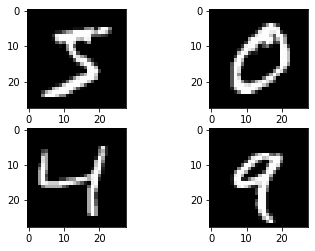

In [44]:
# plotting the first 4 images in the training dataset.
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [9]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [10]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#Creation of Model

In [13]:
#importing libraries for model define
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [30]:
#Model define
def digit_model():
	model = Sequential()
	model.add(Conv2D(30, (3, 3), input_shape=(28, 28,1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

#Building of model

In [31]:
# build the model
model = digit_model()

#Model Training

In [32]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 37s 122ms/step - loss: 0.8073 - accuracy: 0.7441 - val_loss: 0.0830 - val_accuracy: 0.9728
Epoch 2/10
300/300 [==============================] - 36s 121ms/step - loss: 0.1065 - accuracy: 0.9675 - val_loss: 0.0545 - val_accuracy: 0.9827
Epoch 3/10
300/300 [==============================] - 36s 120ms/step - loss: 0.0724 - accuracy: 0.9774 - val_loss: 0.0397 - val_accuracy: 0.9869
Epoch 4/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0334 - val_accuracy: 0.9891
Epoch 5/10
300/300 [==============================] - 36s 121ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0364 - val_accuracy: 0.9875
Epoch 6/10
300/300 [==============================] - 37s 122ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0324 - val_accuracy: 0.9897
Epoch 7/10
300/300 [==============================] - 36s 120ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0300 - val_ac

#Testing

In [33]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy:",scores[1]*100,"%")
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Testing Accuracy: 99.26999807357788 %
CNN Error: 0.73%
